In [320]:
import geopandas as gpd
import pandas as pd
import gudhi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
gudhi.persistence_graphical_tools._gudhi_matplotlib_use_tex=False

In [321]:
SHAPE_PATH = "dataset/shapefiles/025-imperial.shp"
VOTES_PATH = "dataset/final-results/025-imperial.csv"

shapes_gdf = gpd.read_file(SHAPE_PATH)
votes_df = pd.read_csv(VOTES_PATH)

In [322]:
shapes_gdf.columns.values
shapes_gdf = shapes_gdf.set_index('pct16').drop('area', axis=1)
shapes_gdf['centroid'] = shapes_gdf.to_crs('epsg:3785').centroid.to_crs(shapes_gdf.crs)
shapes_gdf = shapes_gdf.drop('geometry', axis=1)

In [323]:
votes_df = votes_df.set_index('pct16')[['pres_clinton', 'pres_trump']]
gdf = shapes_gdf.join(votes_df)
gdf = gdf[gdf['pres_clinton'] < gdf['pres_trump']]

In [324]:
points = [[x, y] for x, y in zip(gdf['centroid'].values.x, gdf['centroid'].values.y)]

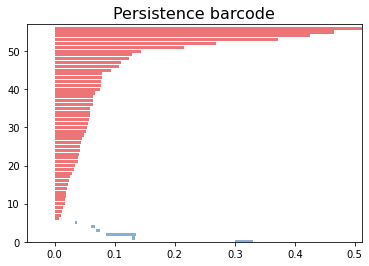

In [337]:
rips_complex = gudhi.RipsComplex(points)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence()
pers_file = 'rips.pers'
simplex_tree.write_persistence_diagram(pers_file)

gudhi.plot_persistence_barcode(diag)
plt.show()

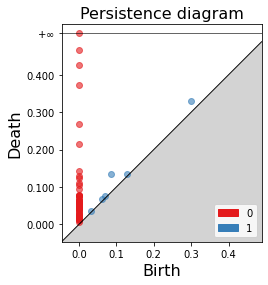

In [326]:
ax = gudhi.plot_persistence_diagram(
    persistence_file=pers_file,
    legend=True)
ax.set_aspect("equal")
plt.show()

In [327]:
fmt = '%s -> %.7f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.0000000
[1] -> 0.0000000
[2] -> 0.0000000
[3] -> 0.0000000
[4] -> 0.0000000
[5] -> 0.0000000
[6] -> 0.0000000
[7] -> 0.0000000
[8] -> 0.0000000
[9] -> 0.0000000
[10] -> 0.0000000
[11] -> 0.0000000
[12] -> 0.0000000
[13] -> 0.0000000
[14] -> 0.0000000
[15] -> 0.0000000
[16] -> 0.0000000
[17] -> 0.0000000
[18] -> 0.0000000
[19] -> 0.0000000
[20] -> 0.0000000
[21] -> 0.0000000
[22] -> 0.0000000
[23] -> 0.0000000
[24] -> 0.0000000
[25] -> 0.0000000
[26] -> 0.0000000
[27] -> 0.0000000
[28] -> 0.0000000
[29] -> 0.0000000
[30] -> 0.0000000
[31] -> 0.0000000
[32] -> 0.0000000
[33] -> 0.0000000
[34] -> 0.0000000
[35] -> 0.0000000
[36] -> 0.0000000
[37] -> 0.0000000
[38] -> 0.0000000
[39] -> 0.0000000
[40] -> 0.0000000
[41] -> 0.0000000
[42] -> 0.0000000
[43] -> 0.0000000
[44] -> 0.0000000
[45] -> 0.0000000
[46] -> 0.0000000
[47] -> 0.0000000
[48] -> 0.0000000
[49] -> 0.0000000
[50] -> 0.0000000
[2, 38] -> 0.0076612
[0, 32] -> 0.0108084
[35, 36] -> 0.0123874
[33, 35] -> 0.0134194
[6, 43

In [335]:
def plot_simplices(simplex_tree, max_epsilon):
    for vert, fval in simplex_tree.get_filtration():
        if fval >= max_epsilon:
            break
        if len(vert) == 1:
            pt = points[vert[0]]
            plt.plot([pt[0]], [pt[1]], marker='o', markersize=3, color='blue')
        elif len(vert) == 2:
            pt1 = points[vert[0]]
            pt2 = points[vert[1]]
            xs = [pt1[0], pt2[0]]
            ys = [pt1[1], pt2[1]]
            plt.plot(xs, ys, color='blue')
        else:
            pts = []
            for v in vert:
                pts.append(points[v])
            pts = np.array(pts)
            p = Polygon(pts, closed=False)
            ax = plt.gca()
            ax.add_patch(p)

    plt.show()

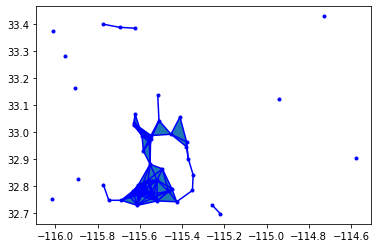

In [338]:
plot_simplices(simplex_tree, 0.098)

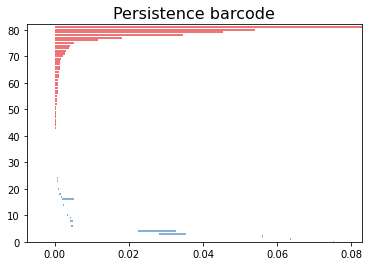

In [339]:
alpha_complex = gudhi.AlphaComplex(points)
simplex_tree = alpha_complex.create_simplex_tree()

diag = simplex_tree.persistence()

pers_file = 'alpha.pers'
simplex_tree.write_persistence_diagram(pers_file)

gudhi.plot_persistence_barcode(diag)
plt.show()

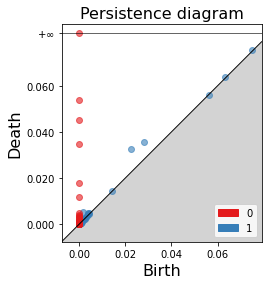

In [332]:
ax = gudhi.plot_persistence_diagram(
    persistence_file=pers_file,
    legend=True)
ax.set_aspect("equal")
plt.show()

In [333]:
fmt = '%s -> %.7f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.0000000
[1] -> 0.0000000
[2] -> 0.0000000
[3] -> 0.0000000
[4] -> 0.0000000
[5] -> 0.0000000
[6] -> 0.0000000
[7] -> 0.0000000
[8] -> 0.0000000
[9] -> 0.0000000
[10] -> 0.0000000
[11] -> 0.0000000
[12] -> 0.0000000
[13] -> 0.0000000
[14] -> 0.0000000
[15] -> 0.0000000
[16] -> 0.0000000
[17] -> 0.0000000
[18] -> 0.0000000
[19] -> 0.0000000
[20] -> 0.0000000
[21] -> 0.0000000
[22] -> 0.0000000
[23] -> 0.0000000
[24] -> 0.0000000
[25] -> 0.0000000
[26] -> 0.0000000
[27] -> 0.0000000
[28] -> 0.0000000
[29] -> 0.0000000
[30] -> 0.0000000
[31] -> 0.0000000
[32] -> 0.0000000
[33] -> 0.0000000
[34] -> 0.0000000
[35] -> 0.0000000
[36] -> 0.0000000
[37] -> 0.0000000
[38] -> 0.0000000
[39] -> 0.0000000
[40] -> 0.0000000
[41] -> 0.0000000
[42] -> 0.0000000
[43] -> 0.0000000
[44] -> 0.0000000
[45] -> 0.0000000
[46] -> 0.0000000
[47] -> 0.0000000
[48] -> 0.0000000
[49] -> 0.0000000
[50] -> 0.0000000
[2, 38] -> 0.0000147
[0, 32] -> 0.0000292
[35, 36] -> 0.0000384
[33, 35] -> 0.0000450
[6, 43

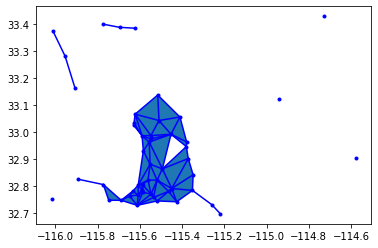

In [340]:
plot_simplices(simplex_tree, 0.005)